In [1]:
import numpy as np 
import pandas as pd

from sklearn.cluster import KMeans 
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.metrics import accuracy_score

D:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('A Motor Maintain.csv')

In [4]:
df.head()

,current,voltage,temperature,humidity,vibration
0,5.1,229.0,65.23,68.0,0.0
1,5.9,230.0,65.56,70.0,1.0
2,8.2,227.0,65.62,68.0,1.0
3,5.5,235.0,65.29,69.0,0.0
4,5.3,235.0,60.42,70.0,0.0


In [3]:
df.isnull()

,current,voltage,temperature,humidity,vibration
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
198,False,False,False,False,False
199,True,True,True,True,True
200,True,True,True,True,True
201,True,True,True,True,True


In [4]:
df.isnull().sum()

current        4
voltage        4
temperature    4
humidity       4
vibration      4
dtype: int64

In [5]:
df.head()

,current,voltage,temperature,humidity,vibration
0,5.1,229.0,65.23,68.0,0.0
1,5.9,230.0,65.56,70.0,1.0
2,8.2,227.0,65.62,68.0,1.0
3,5.5,235.0,65.29,69.0,0.0
4,5.3,235.0,60.42,70.0,0.0


In [6]:
df.describe()

,current,voltage,temperature,humidity,vibration
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,5.683417,231.311558,61.063869,69.085427,0.070352
std,0.596434,3.411717,3.616215,0.851463,0.256384
min,5.000000,225.000000,55.200000,68.000000,0.000000
25%,5.300000,229.000000,58.780000,68.000000,0.000000
50%,5.700000,232.000000,59.880000,69.000000,0.000000
75%,5.900000,234.000000,63.340000,70.000000,0.000000
max,8.200000,235.000000,67.910000,70.000000,1.000000


In [7]:
#Removing Null values
update_df = df.drop([199, 200, 201,202])

In [8]:
update_df

,current,voltage,temperature,humidity,vibration
0,5.1,229.0,65.23,68.0,0.0
1,5.9,230.0,65.56,70.0,1.0
2,8.2,227.0,65.62,68.0,1.0
3,5.5,235.0,65.29,69.0,0.0
4,5.3,235.0,60.42,70.0,0.0
...,...,...,...,...,...
194,5.7,235.0,59.57,68.0,0.0
195,5.7,225.0,59.78,68.0,0.0
196,5.9,231.0,63.28,69.0,1.0
197,5.1,226.0,66.32,70.0,0.0


In [9]:
update_df.isnull().sum()

current        0
voltage        0
temperature    0
humidity       0
vibration      0
dtype: int64

In [10]:
update_df.shape

(199, 5)

In [11]:
update_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   current      199 non-null    float64
 1   voltage      199 non-null    float64
 2   temperature  199 non-null    float64
 3   humidity     199 non-null    float64
 4   vibration    199 non-null    float64
dtypes: float64(5)
memory usage: 9.3 KB


In [12]:
a = update_df.iloc[:,[0,1,2,3,4]]

In [13]:
a

,current,voltage,temperature,humidity,vibration
0,5.1,229.0,65.23,68.0,0.0
1,5.9,230.0,65.56,70.0,1.0
2,8.2,227.0,65.62,68.0,1.0
3,5.5,235.0,65.29,69.0,0.0
4,5.3,235.0,60.42,70.0,0.0
...,...,...,...,...,...
194,5.7,235.0,59.57,68.0,0.0
195,5.7,225.0,59.78,68.0,0.0
196,5.9,231.0,63.28,69.0,1.0
197,5.1,226.0,66.32,70.0,0.0


In [14]:
x = update_df.iloc[:,[0,1,2,3,4]].values

In [15]:
x

array([[  5.1 , 229.  ,  65.23,  68.  ,   0.  ],
       [  5.9 , 230.  ,  65.56,  70.  ,   1.  ],
       [  8.2 , 227.  ,  65.62,  68.  ,   1.  ],
       [  5.5 , 235.  ,  65.29,  69.  ,   0.  ],
       [  5.3 , 235.  ,  60.42,  70.  ,   0.  ],
       [  5.3 , 230.  ,  59.22,  69.  ,   0.  ],
       [  5.2 , 226.  ,  63.34,  69.  ,   0.  ],
       [  5.7 , 234.  ,  66.4 ,  70.  ,   0.  ],
       [  5.3 , 234.  ,  59.57,  68.  ,   0.  ],
       [  5.8 , 231.  ,  59.78,  69.  ,   0.  ],
       [  5.7 , 230.  ,  56.16,  68.  ,   0.  ],
       [  6.  , 233.  ,  56.06,  70.  ,   0.  ],
       [  5.4 , 233.  ,  63.6 ,  68.  ,   0.  ],
       [  5.7 , 230.  ,  61.48,  70.  ,   0.  ],
       [  5.5 , 225.  ,  67.91,  70.  ,   0.  ],
       [  5.4 , 232.  ,  63.58,  70.  ,   0.  ],
       [  5.5 , 225.  ,  64.31,  68.  ,   0.  ],
       [  5.2 , 233.  ,  59.73,  70.  ,   0.  ],
       [  5.5 , 233.  ,  67.89,  70.  ,   0.  ],
       [  5.6 , 226.  ,  61.82,  68.  ,   0.  ],
       [  5.3 , 234.

In [16]:
#using wcss

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


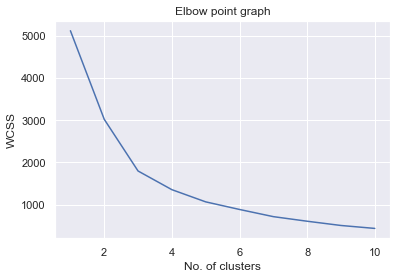

In [17]:
#plot elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow point graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#Optimum no. of cluster is 2

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

y = kmeans.fit_predict(x)

In [19]:
print(y)

[0 0 1 0 2 2 1 0 2 2 2 2 0 1 1 0 1 2 0 1 0 2 2 2 2 1 2 0 2 0 2 2 2 2 0 1 0
 0 1 0 2 1 2 0 2 2 2 2 0 1 1 0 2 2 2 2 0 2 1 2 2 0 1 2 0 0 2 1 2 2 1 0 2 2
 1 2 0 1 2 2 2 2 2 1 2 1 2 1 2 2 0 1 2 0 0 1 0 2 2 2 2 2 2 1 0 0 2 1 2 2 0
 1 2 1 2 2 0 1 2 0 0 2 1 2 2 1 0 2 0 1 2 0 0 1 0 2 2 2 2 2 2 1 0 1 0 1 0 0
 0 1 2 2 2 2 0 1 2 0 0 2 1 2 2 1 0 2 1 2 0 0 2 1 2 2 1 0 1 0 0 0 1 2 2 2 2
 0 1 2 0 2 1 2 0 0 2 1 0 1 2]


In [20]:
len(y)

199

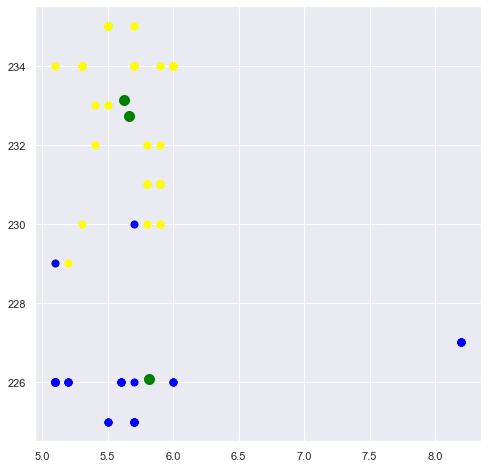

In [21]:
#scater plot
#visualiszing ploting

plt.figure(figsize = (8,8))
plt.scatter(x[y == 0,0], x[y == 0,1], s = 50, c= 'yellow', label ='C1')
plt.scatter(x[y == 1,0], x[y == 1,1], s = 50, c= 'blue', label ='C2')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c='green', label ='Centroid')
plt.show()

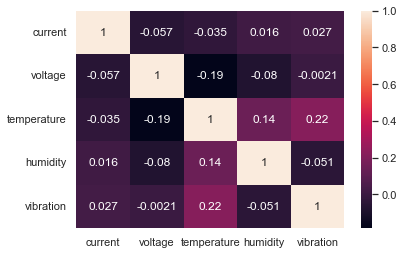

In [22]:
sns.heatmap(update_df.corr(), annot=True)
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy")

In [24]:
classifier.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [25]:
ypred = classifier.predict(x)
ypred

array([0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 0,
       2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2,
       0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0,
       0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0,
       1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1,
       2])

In [26]:
accuracy_score(y, ypred)

1.0

In [27]:
# input
# 0 5.8--232--59.22--68--0
# 1 5.1--229--65.23--68--0

current = 5.8
voltage = 232
temperature = 59.22
humidity = 68
vibration = 0

# current = 5.1
# voltage = 229
# temperature = 65.23
# humidity = 68
# vibration = 0

In [28]:
test = [[current, voltage, temperature, humidity, vibration]]

In [29]:
def give_pred(test):
    prediction = classifier.predict(test)
    
    if prediction == 0:
        return('System Failed')
    else:
        return('System Works')
   

In [30]:
print(give_pred(test))

System Works


In [31]:
import PySimpleGUI as sg

In [35]:
sg.theme('DarkBlue')

output = sg.Text()
layout = [  [sg.Text('Enter Data')],
            [sg.Text('Current'), sg.InputText()],
            [sg.Text('Voltage'), sg.InputText()],
            [sg.Text('Temperature'), sg.InputText()],
            [sg.Text('Humidity'), sg.InputText()],
            [sg.Text('Vibration'), sg.InputText()],
            [output],
            [sg.Button('Ok'), sg.Button('Cancel')] ]

# current = values[0]
# voltage = values[1]
# temperature = values[2]
# humidity = values[3]
# vibration = values[4]

window = sg.Window('Predictive Motor Maintenance', layout)

while True:
    event, values = window.read()
    
#     test = [[values[0], values[1], values[2], values[3], values[4]]]

    if event == sg.WIN_CLOSED or event == 'Cancel':
        break
    
    result = give_pred([ [values[0], values[1], values[2], values[3], values[4]] ])
    print('Your', result)
    output.update(result)

window.close()

Your  System Works
